In [1]:
%load_ext autoreload
%autoreload 2



In [10]:
from mlflow import MlflowClient
import mlflow
import numpy as np
import pandas as pd
import scipy

In [3]:
client = MlflowClient(tracking_uri="http://192.168.1.181:5010")
mlflow.set_tracking_uri("http://192.168.1.181:5010")


In [4]:
experiment_id = client.get_experiment_by_name("07.04-params-check-ga-3").experiment_id

In [5]:
runs = mlflow.search_runs(experiment_ids=experiment_id)

In [6]:
runs = runs[runs.status == "FINISHED"]

In [7]:
runs

,run_id,experiment_id,status,artifact_uri,start_time,end_time,metrics.depth_mean,metrics.n_leaves_max,metrics.n_leaves_mean,metrics.n_leaves_median,...,metrics.depth_min,params.pop_size,params.max_tree_depth,params.subspaces,params.n_gen,params.data_shuffle_random_state,params.dataset,params.should_take_test,tags.mlflow.loggedArtifacts,tags.mlflow.runName
0,37631c9c9bf9444c8a92f9df1eb4d2b5,49,FINISHED,mlflow-artifacts:/49/37631c9c9bf9444c8a92f9df1...,2024-07-04 16:53:47.292000+00:00,2024-07-05 00:43:20.629000+00:00,0.800000,4.0,1.800000,1.5,...,0.0,100,10,10,100,69,haberman,False,"[{""path"": ""convergence_history.json"", ""type"": ...",masked-donkey-225
1,aed181f7baee42eb8abac9d4da578d4d,49,FINISHED,mlflow-artifacts:/49/aed181f7baee42eb8abac9d4d...,2024-07-04 16:53:47.279000+00:00,2024-07-05 00:41:47.411000+00:00,2.000000,6.0,3.000000,2.0,...,1.0,100,10,5,100,69,haberman,False,"[{""path"": ""convergence_history.json"", ""type"": ...",crawling-roo-98
2,b8b6857796ae47c69b27ae4e9ee4d21d,49,FINISHED,mlflow-artifacts:/49/b8b6857796ae47c69b27ae4e9...,2024-07-04 16:53:47.270000+00:00,2024-07-05 00:42:29.198000+00:00,1.714286,7.0,3.142857,2.0,...,1.0,100,10,10,100,69,haberman,True,"[{""path"": ""convergence_history.json"", ""type"": ...",unique-mink-316
3,730eade53c794909bfa2c2e074de7e2e,49,FINISHED,mlflow-artifacts:/49/730eade53c794909bfa2c2e07...,2024-07-04 16:53:47.267000+00:00,2024-07-05 00:41:26.429000+00:00,1.400000,3.0,2.400000,2.0,...,1.0,100,10,5,100,69,haberman,True,"[{""path"": ""convergence_history.json"", ""type"": ...",angry-hog-179
4,cabebca493a341599b6ed56fe2a619c3,49,FINISHED,mlflow-artifacts:/49/cabebca493a341599b6ed56fe...,2024-07-04 16:53:47.223000+00:00,2024-07-05 00:32:30.673000+00:00,1.333333,5.0,2.444444,2.0,...,0.0,10,10,10,100,69,haberman,False,"[{""path"": ""convergence_history.json"", ""type"": ...",exultant-shad-356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,52d75536b51349ffb7cc275510809163,49,FINISHED,mlflow-artifacts:/49/52d75536b51349ffb7cc27551...,2024-07-04 16:53:11.563000+00:00,2024-07-04 16:59:35.944000+00:00,1.333333,5.0,2.666667,2.0,...,0.0,50,5,5,50,42,wisconsin,False,"[{""path"": ""convergence_history.json"", ""type"": ...",peaceful-dolphin-264
1020,bf63e22a01164644a800082b6c8a723a,49,FINISHED,mlflow-artifacts:/49/bf63e22a01164644a800082b6...,2024-07-04 16:53:11.551000+00:00,2024-07-04 16:59:37.532000+00:00,1.666667,4.0,2.666667,3.0,...,0.0,50,5,5,50,42,wisconsin,True,"[{""path"": ""convergence_history.json"", ""type"": ...",capricious-moose-100
1021,e5fec82bed724814976e1bcb8fc9385e,49,FINISHED,mlflow-artifacts:/49/e5fec82bed724814976e1bcb8...,2024-07-04 16:53:11.548000+00:00,2024-07-04 16:58:10.882000+00:00,3.000000,5.0,4.500000,4.5,...,3.0,25,5,5,50,42,wisconsin,True,"[{""path"": ""convergence_history.json"", ""type"": ...",delicate-bug-897
1022,4ea9d96a060b46d3beb486e27226e43b,49,FINISHED,mlflow-artifacts:/49/4ea9d96a060b46d3beb486e27...,2024-07-04 16:53:11.535000+00:00,2024-07-04 16:59:59.383000+00:00,0.571429,5.0,1.714286,1.0,...,0.0,50,5,10,50,42,wisconsin,True,"[{""path"": ""convergence_history.json"", ""type"": ...",illustrious-roo-546


In [11]:
def compute_skew(run_id):
    return scipy.stats.skew(client.load_table(experiment_id=experiment_id, run_ids=[run_id], artifact_file="convergence_history.json").convergence.dropna())


In [12]:
skews = runs.run_id.apply(compute_skew)

/var/folders/fd/dyfc8ph167q7r5pf9y8451540000gn/T/ipykernel_34803/3434097009.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return scipy.stats.skew(client.load_table(experiment_id=experiment_id, run_ids=[run_id], artifact_file="convergence_history.json").convergence.dropna())
/var/folders/fd/dyfc8ph167q7r5pf9y8451540000gn/T/ipykernel_34803/3434097009.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return scipy.stats.skew(client.load_table(experiment_id=experiment_id, run_ids=[run_id], artifact_file="convergence_history.json").convergence.dropna())
/var/folders/fd/dyfc8ph167q7r5pf9y8451540000gn/T/ipykernel_34803/3434097009.py:2: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This o

In [13]:
runs['skews'] = skews

In [14]:
runs['elapsed'] = runs['end_time'] - runs['start_time']

In [15]:
runs['elapsed'].lt(pd.Timedelta(hours=5))

0       False
1       False
2       False
3       False
4       False
        ...  
1019     True
1020     True
1021     True
1022     True
1023     True
Name: elapsed, Length: 1024, dtype: bool

In [20]:
runs.run_id

0       37631c9c9bf9444c8a92f9df1eb4d2b5
1       aed181f7baee42eb8abac9d4da578d4d
2       b8b6857796ae47c69b27ae4e9ee4d21d
3       730eade53c794909bfa2c2e074de7e2e
4       cabebca493a341599b6ed56fe2a619c3
                      ...               
1019    52d75536b51349ffb7cc275510809163
1020    bf63e22a01164644a800082b6c8a723a
1021    e5fec82bed724814976e1bcb8fc9385e
1022    4ea9d96a060b46d3beb486e27226e43b
1023    31f8f954b42a4e0bbf8c8133da39aaa5
Name: run_id, Length: 1024, dtype: object

In [22]:
runs.artifact_uri[0]

'mlflow-artifacts:/49/37631c9c9bf9444c8a92f9df1eb4d2b5/artifacts'

In [28]:
def get_accuracy(artifact_uri):
    results = mlflow.artifacts.load_dict(f"{artifact_uri}/cls_report")
    
    return results['accuracy']

In [29]:
accs = runs.artifact_uri.apply(get_accuracy)


In [30]:
runs['test_acc'] = accs

In [24]:
results = mlflow.artifacts.load_dict(f"{runs.artifact_uri[0]}/cls_report")

In [27]:
results['accuracy']

0.6797385620915033

In [16]:
client.load(experiment_id=experiment_id, run_ids=["aed181f7baee42eb8abac9d4da578d4d"], artifact_file="cls_").convergence.dropna()

2024/07/05 14:28:01 WARNING mlflow.tracking.client: Not all runs have the specified table artifact. Some runs will be skipped.


MlflowException: No runs found with the corresponding table artifact.

In [ ]:
scipy.stats.skew(client.load_table(experiment_id=experiment_id, run_ids=["f7c455103bb44cf9af942ae5aae024ed"], artifact_file="convergence_history.json").convergence.dropna())

2.182684443970591


<Axes: >

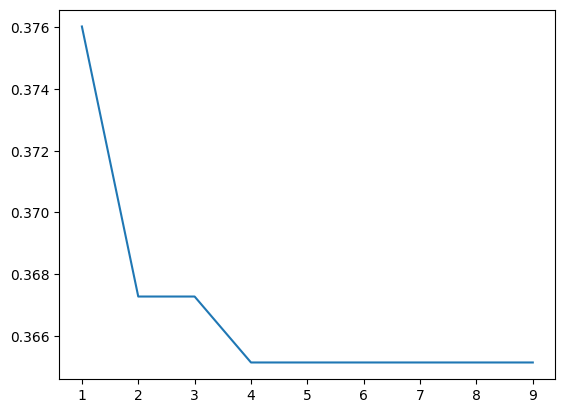

In [72]:
print(scipy.stats.skew(client.load_table(experiment_id=experiment_id, run_ids=["87d07efb1e314f07a8a52d0aa1770f8b"], artifact_file="convergence_history.json").convergence.dropna()))
client.load_table(experiment_id=experiment_id, run_ids=["87d07efb1e314f07a8a52d0aa1770f8b"], artifact_file="convergence_history.json").convergence.plot()

3.199449327041649


<Axes: >

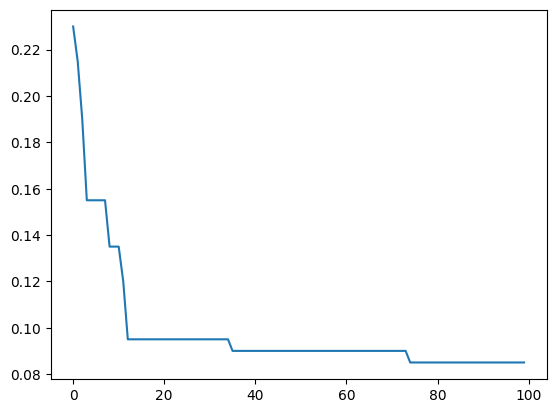

In [70]:
print(scipy.stats.skew(client.load_table(experiment_id=experiment_id, run_ids=["00afaadd3d7648198e813debf4e3e86c"], artifact_file="convergence_history.json").convergence.dropna()))
client.load_table(experiment_id=experiment_id, run_ids=["00afaadd3d7648198e813debf4e3e86c"], artifact_file="convergence_history.json").convergence.plot()

0.23337229244557703


<Axes: >

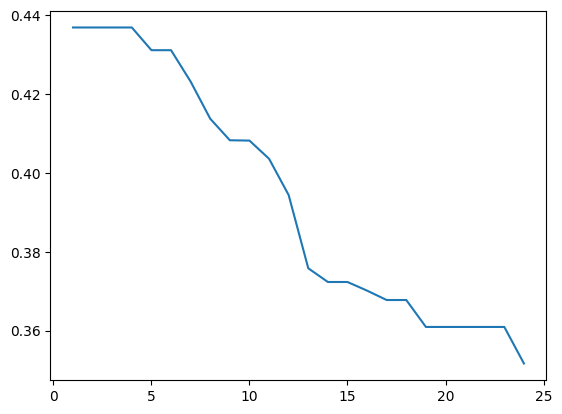

In [69]:
print(scipy.stats.skew(client.load_table(experiment_id=experiment_id, run_ids=["1e9a206689374cbb93819f683d7d96db"], artifact_file="convergence_history.json").convergence.dropna()))
client.load_table(experiment_id=experiment_id, run_ids=["1e9a206689374cbb93819f683d7d96db"], artifact_file="convergence_history.json").convergence.plot()

2.188025417127126


<Axes: >

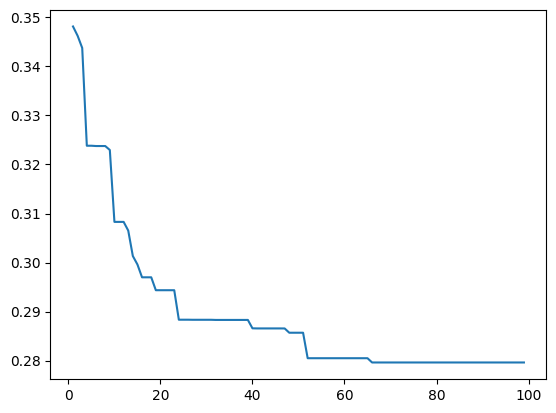

In [68]:
print(scipy.stats.skew(client.load_table(experiment_id=experiment_id, run_ids=["a429c33c446041ab82ccb063b24ebe4c"], artifact_file="convergence_history.json").convergence.dropna()))
client.load_table(experiment_id=experiment_id, run_ids=["a429c33c446041ab82ccb063b24ebe4c"], artifact_file="convergence_history.json").convergence.plot()

In [28]:
runs[runs['elapsed'].lt(pd.Timedelta(hours=12))].groupby('params.dataset')['elapsed'].mean()

params.dataset
balance       0 days 05:29:27.830035714
banana        0 days 05:44:28.552428571
coil2000      0 days 07:12:29.808041666
dermatology   0 days 05:52:38.372727272
flare            0 days 07:44:34.429750
housevotes    0 days 05:55:43.822769230
mushroom         0 days 06:09:33.199840
saheart          0 days 05:50:59.259000
thyroid          0 days 06:53:17.935300
tic-tac-toe   0 days 06:16:08.540416666
wdbc          0 days 06:02:24.867944444
wine             0 days 06:07:29.148500
wisconsin        0 days 06:09:55.312450
zoo              0 days 06:10:40.133300
Name: elapsed, dtype: timedelta64[ns]

In [10]:
finished_df = runs[runs.status == "FINISHED"]\
    .drop(['experiment_id', 'status', 'run_id', 'artifact_uri', 'start_time', 'end_time', 'tags.mlflow.runName'], axis=1)

In [11]:
finished_df

,metrics.dt_test_acc,metrics.rf_test_acc,metrics.train_acc,metrics.test_acc,params.n_gen,params.pop_size,params.should_take_test,params.subspaces,params.dataset,params.max_tree_depth,params.data_shuffle_random_state
0,0.640693,0.696970,0.909091,0.623377,100,100,True,10,saheart,10,69
1,0.640693,0.696970,0.831169,0.675325,100,100,True,5,saheart,10,69
2,0.640693,0.696970,0.935065,0.645022,100,10,True,10,saheart,10,69
3,0.640693,0.696970,0.783550,0.619048,100,10,True,5,saheart,10,69
4,0.640693,0.696970,0.904762,0.653680,100,25,True,10,saheart,10,69
...,...,...,...,...,...,...,...,...,...,...,...
763,0.914956,0.947214,0.979532,0.894428,50,10,True,5,wisconsin,5,42
764,0.914956,0.947214,0.982456,0.920821,50,25,True,10,wisconsin,5,42
765,0.914956,0.947214,0.988304,0.914956,50,25,True,5,wisconsin,5,42
766,0.914956,0.947214,0.979532,0.909091,50,50,True,10,wisconsin,5,42


In [12]:
finished_df['diff-to-dt'] = finished_df['metrics.test_acc'] - finished_df['metrics.dt_test_acc']
finished_df['diff-to-rf'] = finished_df['metrics.test_acc'] - finished_df['metrics.rf_test_acc']
finished_df['better-equal-rf'] = finished_df['metrics.test_acc'] >= finished_df['metrics.rf_test_acc']
finished_df['better-dt'] = finished_df['metrics.test_acc'] > finished_df['metrics.dt_test_acc']

In [48]:
finished_df.groupby('params.dataset')['better-equal-rf'].mean()

params.dataset
bands         0.062500
bupa          0.031250
hepatitis     0.125000
ionosphere    0.023438
saheart       0.031250
wisconsin     0.000000
Name: better-equal-rf, dtype: float64

<Axes: xlabel='better-equal-rf'>

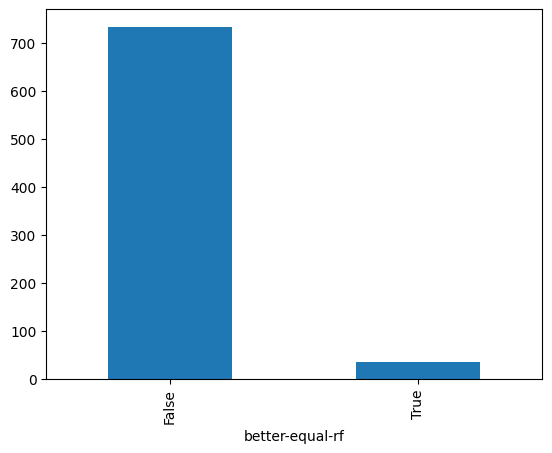

In [13]:
finished_df['better-equal-rf'].groupby().value_counts().plot(kind='bar')

<Axes: xlabel='better-dt'>

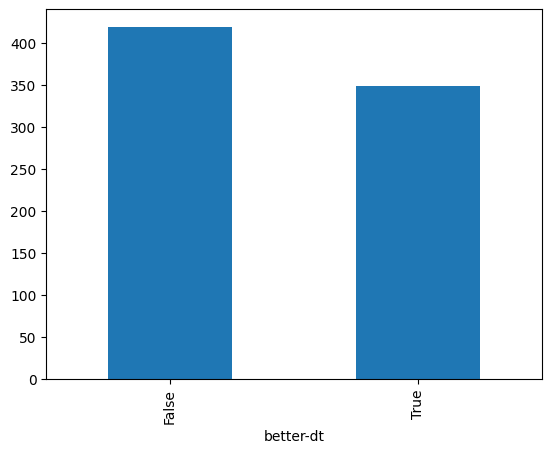

In [14]:
finished_df['better-dt'].value_counts().plot(kind='bar')

<Axes: xlabel='params.pop_size'>

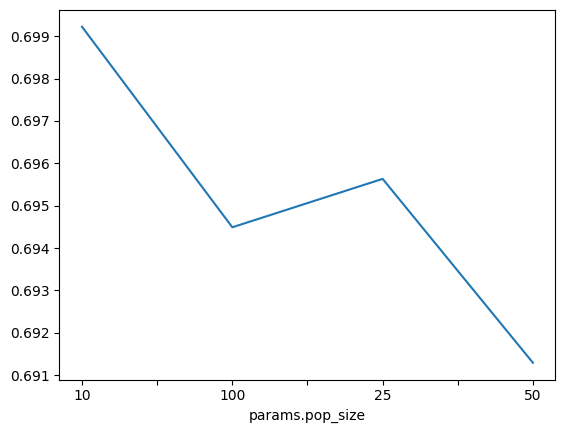

In [83]:
runs.groupby('params.pop_size')['metrics.test_acc'].mean().plot(kind='line')

<Axes: xlabel='params.n_gen'>

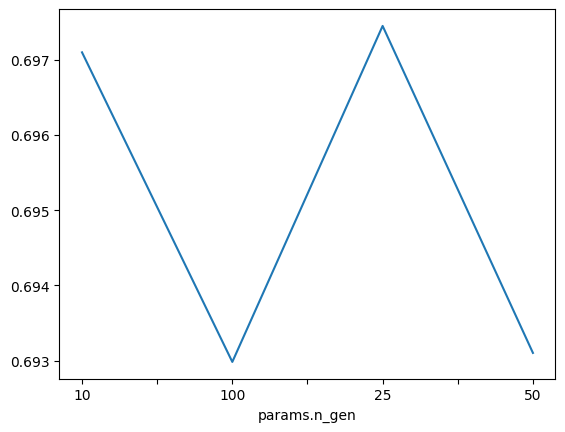

In [80]:
runs.groupby('params.n_gen')['metrics.test_acc'].mean().plot(kind='line')

<Axes: xlabel='params.pop_size'>

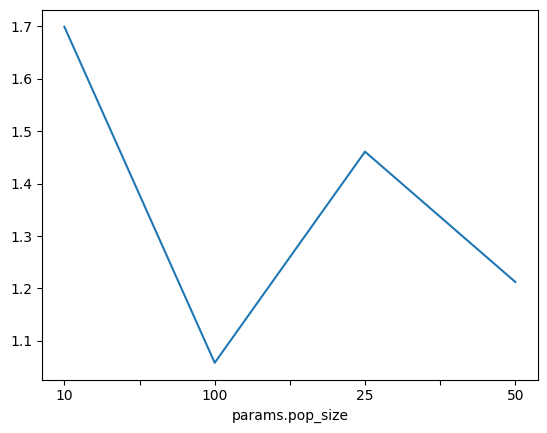

In [17]:
runs.groupby('params.pop_size')['skews'].mean().plot(kind='line')

<Axes: xlabel='params.n_gen'>

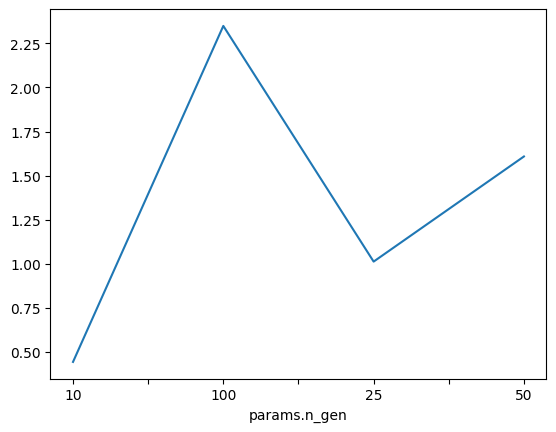

In [18]:
runs.groupby('params.n_gen')['skews'].mean().plot(kind='line')

In [19]:
runs.groupby(['params.pop_size', 'params.n_gen'])['skews'].mean()

params.pop_size  params.n_gen
10               10              0.687291
                 100             2.622416
                 25              1.466561
                 50              2.002826
100              10              0.288690
                 100             1.927969
                 25              0.727000
                 50              1.277796
25               10              0.428729
                 100             2.645640
                 25              1.015258
                 50              1.753348
50               10              0.376763
                 100             2.202802
                 25              0.850038
                 50              1.407003
Name: skews, dtype: float64

In [31]:
runs.groupby(['params.pop_size', 'params.n_gen'])['test_acc'].mean() + runs.groupby(['params.pop_size', 'params.n_gen'])['skews'].mean()

params.pop_size  params.n_gen
10               10              1.445905
                 100             3.381709
                 25              2.227750
                 50              2.762424
100              10              1.062325
                 100             2.701108
                 25              1.500267
                 50              2.050312
25               10              1.205030
                 100             3.422104
                 25              1.789403
                 50              2.525467
50               10              1.152116
                 100             2.972379
                 25              1.621989
                 50              2.178206
dtype: float64

<Axes: xlabel='params.pop_size,params.n_gen'>

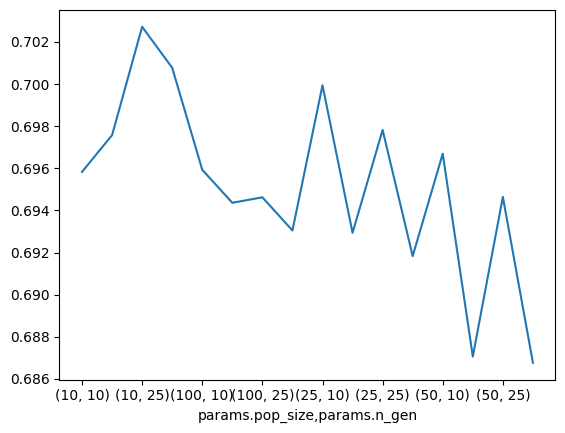

In [81]:
runs.groupby(['params.pop_size', 'params.n_gen'])['metrics.test_acc'].mean().plot(kind='line')

In [72]:
finished_df.query('`params.dataset` == "banana"')[['metrics.dt_test_acc', 'params.base_clf']]

,metrics.dt_test_acc,params.base_clf
1780,0.868302,dt
1781,0.868302,dt
1782,0.868302,dt
1783,0.868302,dt
1844,0.855849,dt
...,...,...
3767,0.855849,knn
3828,0.856604,knn
3829,0.856604,knn
3834,0.856604,knn


In [73]:
import itertools
from scipy.stats import wilcoxon
from collections import defaultdict

In [75]:
columns = list(set(finished_df['params.base_clf']))
column_combinations = itertools.permutations(columns, 2)
final_df = defaultdict(lambda: defaultdict(list))
final_test_df = defaultdict(lambda: defaultdict(list))
for dataset in set(finished_df['params.dataset']):
    for base_clf in columns:
        final_df[dataset][base_clf] = np.mean(finished_df.query(f"`params.base_clf` == '{base_clf}' and `params.dataset` == '{dataset}'")['metrics.test_acc'])

    for c1, c2 in column_combinations:
        if final_df[dataset][c1] > final_df[dataset][c2]:
            final_test_df[dataset][c1].append(c2)

In [76]:
pd.DataFrame(final_df)

,balance,dermatology,flare,wdbc,wisconsin,tic-tac-toe,housevotes,wine,saheart,banana,coil2000,thyroid,zoo,mushroom
knn,0.829487,0.804469,0.701220,0.919894,0.918988,0.786708,0.899867,0.862493,0.594805,0.877333,0.930632,0.967678,0.830000,0.995697
dt,0.804487,0.864525,0.724203,0.907277,0.898338,0.807411,0.935345,0.792135,0.625541,0.866604,0.889296,0.993796,0.913333,0.999026
bayes,0.788248,0.850236,0.659850,0.912705,0.915746,0.713779,0.878079,0.826517,0.673882,0.727660,0.183843,0.484465,0.927500,0.928192


In [77]:
pd.DataFrame(final_test_df)

,balance
dt,[bayes]
knn,"[dt, bayes]"


In [65]:
finished_df.groupby(['params.dataset', 'params.base_clf']).apply(func)

      metrics.dt_test_acc  metrics.test_acc  metrics.rf_test_acc  \
2424             0.759615          0.730769             0.823718   
2425             0.759615          0.823718             0.823718   
2426             0.759615          0.730769             0.823718   
2427             0.759615          0.823718             0.823718   
2488             0.775641          0.724359             0.820513   
2489             0.775641          0.810897             0.820513   
2490             0.775641          0.724359             0.820513   
2491             0.775641          0.810897             0.820513   
2552             0.791667          0.730769             0.852564   
2553             0.791667          0.810897             0.852564   
2554             0.791667          0.730769             0.852564   
2555             0.791667          0.810897             0.852564   
2616             0.810897          0.766026             0.858974   
2617             0.810897          0.817308     

""


In [31]:
finished_df[['params.dataset_name','params.dataset_name', 'better-dt', 'better-equal-rf']]

,params.dataset_name,params.dataset_name,better-dt,better-equal-rf
0,shuttle,shuttle,False,False
1,wine,wine,False,False
3,wisconsin,wisconsin,False,False
4,haberman,haberman,True,False
5,titanic,titanic,False,True
...,...,...,...,...
91,heart,heart,True,True
92,heart,heart,False,False
93,heart,heart,True,True
94,heart,heart,False,False


In [33]:
finished_df.groupby(["params.n_clf"]) \
    ['better-equal-rf'] \
    .apply(lambda x: np.sum(x)/len(x)) 

params.n_clf
10    0.250000
20    0.136364
3     0.250000
5     0.208333
Name: better-equal-rf, dtype: float64